### Download HRRR Data using Herbie

Notebook contents 

https://herbie.readthedocs.io/en/2024.3.0/user_guide/install.html
* attempting to use Herbie to download HRRR data 

created by Cassie Lumbrazo\
last updated: Jan 2025\
run location: UAS linux\
python environment: **herbie**\
*created a new environment for herbie data downloader...*

In [2]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime, timedelta

import scipy

In [3]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

In [4]:
from herbie import Herbie
# from toolbox import EasyMap, pc
# from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import os
import glob
import rioxarray


Download for HRRR-AK at hour 00:00, fxx=0

In [26]:
H = Herbie(
    "2020-10-01 00:00",
    model="hrrrak",
    product="sfc",
    fxx=0,
)

✅ Found ┊ model=hrrrak ┊ product=sfc ┊ 2020-Oct-01 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws


Download for HRRR-AK at hour 01:00, fxx=0

In [27]:
H = Herbie(
    "2020-10-01 01:00",
    model="hrrrak",
    product="sfc",
    fxx=0,
)

💔 Did not find ┊ model=hrrrak ┊ product=sfc ┊ 2020-Oct-01 01:00 UTC F00


Download HRRR at hour 00:00, fxx=0

In [28]:
H = Herbie(
    "2020-10-01 00:00",
    model="hrrr",
    product="sfc",
    fxx=0,
)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2020-Oct-01 01:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


Download HRRR at hour 01:00, fxx=0

In [29]:
H = Herbie(
    "2020-10-01 01:00",
    model="hrrr",
    product="sfc",
    fxx=0,
)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2020-Oct-01 01:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [43]:
# show additional products 
H.PRODUCTS

{'prs': '3D pressure level fields; 3-km resolution',
 'sfc': '2D surface level fields; 3-km resolution',
 'nat': 'Native level fields; 3-km resolution',
 'subh': 'Subhourly grids; 3-km resolution'}

In [9]:
H.DESCRIPTION

'High-Resolution Rapid Refresh - Alaska'

In [10]:
H.date

Timestamp('2023-11-01 01:00:00')

In [11]:
H.DETAILS

{'nomads product description': 'https://www.nco.ncep.noaa.gov/pmb/products/hrrr'}

In [12]:
H.product_description

'2D surface level fields; 3-km resolution'

In [13]:
ds = H.xarray("TMP:2 m")
ds

ValueError: 
No index file was found for None
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`

There is a herbie tool to pick data from the nearest lat/lon

In [146]:
points = pd.DataFrame({
    "longitude": [-100, -105, -98.4],
    "latitude": [40, 29, 42.3],
})

# Get nearest points
nearest_data = ds.herbie.pick_points(points)

INFO: 🌱 Growing new BallTree...🌳 BallTree grew in 0.78 seconds.
INFO: Saved BallTree to /home/cassie/data/BallTree/hrrrak_1299-919.pkl
       longitude  latitude  point_grid_distance  grid_index  y_grid  x_grid  \
point                                                                         
0         -100.0      40.0          2537.334043        1298       0    1298   
1         -105.0      29.0          3186.154850        1298       0    1298   
2          -98.4      42.3          2486.076496        1298       0    1298   

       latitude_grid  longitude_grid  
point                                 
0           51.72556      231.526897  
1           51.72556      231.526897  
2           51.72556      231.526897  



In [149]:
ds = ds.herbie.to_180()

In [150]:
ds.herbie.crs

<Projected CRS: +proj=stere +ellps=sphere +a=6371229.0 +b=6371229. ...>
Name: unknown
Axis Info [cartesian]:
- E[south]: Easting (metre)
- N[south]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Polar Stereographic (variant B)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

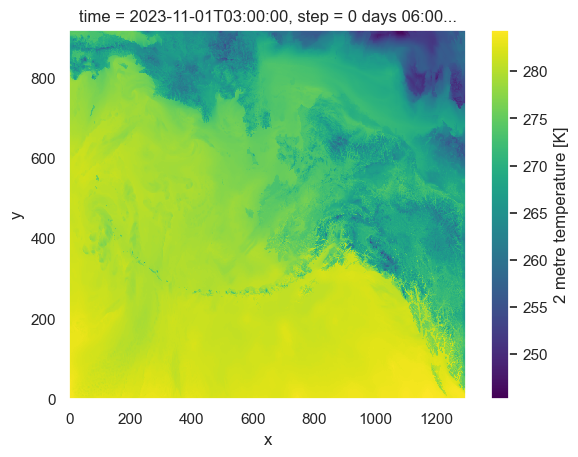

In [151]:
ds['t2m'].plot()

In [19]:
ds['t2m'].attrs

{'GRIB_paramId': 167,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 1193781,
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'polar_stereographic',
 'GRIB_NV': 0,
 'GRIB_cfName': 'air_temperature',
 'GRIB_cfVarName': 't2m',
 'GRIB_gridDefinitionDescription': 'Polar stereographic can be south or north',
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': '2 metre temperature',
 'GRIB_parameterName': 'Temperature',
 'GRIB_parameterUnits': 'K',
 'GRIB_shortName': '2t',
 'GRIB_stepRange': '6',
 'GRIB_units': 'K',
 'long_name': '2 metre temperature',
 'units': 'K',
 'standard_name': 'air_temperature',
 'grid_mapping': 'gribfile_projection'}

That's only 2-m air temperature, there are other surface fields 

In [20]:
H.PRODUCTS

{'prs': '3D pressure level fields; 3-km resolution',
 'sfc': '2D surface level fields; 3-km resolution',
 'nat': 'Native level fields; 3-km resolution',
 'subh': 'Subhourly grids; 3-km resolution'}